# Levelable - Data Analysis

A file to do some basic data wrangling on the data generated by `levelable_main.ipynb`.

In [2]:
# Load some relevant packages
import pandas as pd
import numpy as np

from sage.graphs.independent_sets import IndependentSets
from sage.graphs.graph_input import from_graph6
from sage.graphs.trees import TreeIterator

## Compile results into a single dataframe

In [96]:
results = pd.DataFrame()

for n in range(5, 10):
    if n < 9:
        results = results.append(pd.read_csv("results/resultsconnected" + str(n) + ".csv"), ignore_index = True)
    
    else:
        for i in range(1, n+1):
            results = results.append(pd.read_csv("results/resultsconnected" + str(n) + "_" + str(i) + "of" + str(n) + ".csv"), ignore_index = True)

results

,graph6 string,levelable,minimized solution
0,D?{,T,"[2.0, 2.0, 2.0, 2.0, 5.0]"
1,D@s,T,"[2.0, 2.0, 2.0, 2.0, 3.0]"
2,D@{,T,"[2.0, 2.0, 2.0, 2.0, 4.0]"
3,DIk,T,"[2.0, 3.0, 2.0, 2.0, 2.0]"
4,DBk,T,"[2.0, 2.0, 2.0, 3.0, 3.0]"
5,DB{,T,"[2.0, 2.0, 2.0, 3.0, 4.0]"
6,DFw,T,"[2.0, 2.0, 2.0, 3.0, 2.0]"
7,DF{,T,"[2.0, 2.0, 2.0, 4.0, 4.0]"
8,DBg,F,NaN
9,DK[,T,"[2.0, 2.0, 2.0, 2.0, 2.0]"


## Enumerating levelable graphs

In [13]:
# Results over how many vertices?
minVertices = 5
maxVertices = 10

vertices = range(minVertices, maxVertices)

resultsHead = list([["Vertices", "Levelable", "Total graphs"]])
results = list()

for n in vertices:
    # Read the .csv
    df = pd.read_csv("results/results" + str(n) + ".csv")
    
    # Count the number of total graphs in the .csv
    countAll = df.shape[0]
    
    # Count the number of levelable in the .csv
    countLev = df[df.levelable == "T"].shape[0]
    
    results.append([n, countLev, countAll])

print pd.DataFrame(data = np.array(results), columns =resultsHead)

   Vertices  Levelable  Total graphs
0         5         33            34
1         6        140           156
2         7        793          1044
3         8       6962         12346
4         9      98281        274668


## Smallest non-levelable graph
By inspection, there is only one graph on 5 vertices that is not levelable. 

In [3]:
df5 = pd.read_csv("results/results5.csv")

print df5[df5.levelable == "F"]

# Get the index where the False occurs
ind = df5.index[df5.levelable == "F"][0]

# Get the graph6 string of that entry
g6s = df5.loc[ind]["graph6 string"]


   graph6 string levelable minimized solution
19           DQo         F                NaN


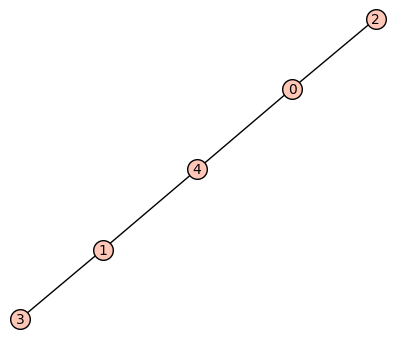

'DQo'

In [5]:
# Load the graph
g = Graph()
from_graph6(g, g6s)

# Show the graph
g.show()
g.graph6_string()

## Are all paths with greater than 4 vertices not levelable?

In [13]:
print ("Is it levelable?")

for n in range(5,21):

    if is_levelable(graphs.PathGraph(n)):
        answer = "Yes"
    else:
        answer = "No"
        
    print "path on " + str(n) + " vertices: " + answer
    

Is it levelable?
path on 5 vertices: No
path on 6 vertices: No
path on 7 vertices: No
path on 8 vertices: No
path on 9 vertices: No
path on 10 vertices: No
path on 11 vertices: No
path on 12 vertices: No
path on 13 vertices: No
path on 14 vertices: No
path on 15 vertices: No
path on 16 vertices: No
path on 17 vertices: No
path on 18 vertices: No
path on 19 vertices: No
path on 20 vertices: No


## Do non-levelable graphs always have a path of length >4  embedded?

### Look at non-levelable graphs

We should expect that these DO have such paths.

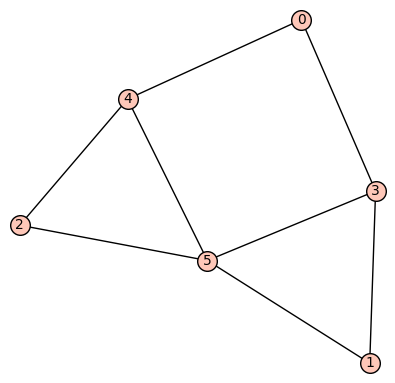

EEhw  6


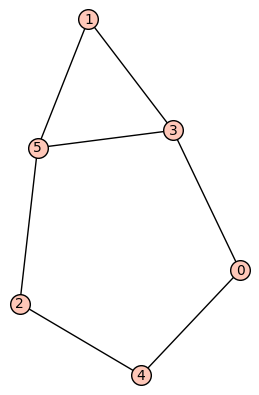

EEho  6


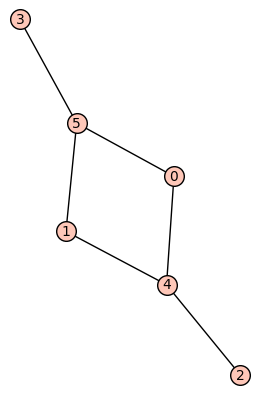

E?zO  5


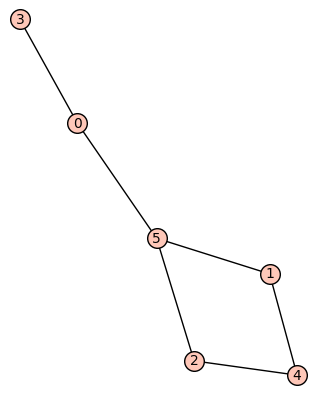

ECZ_  6


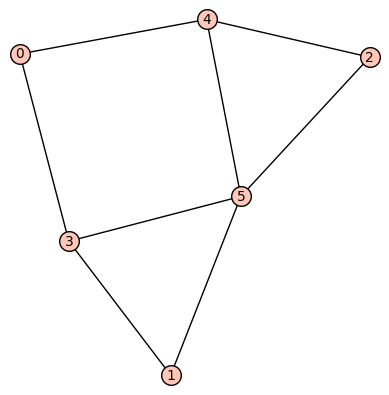

EEhw  6


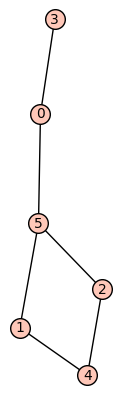

ECZ_  6


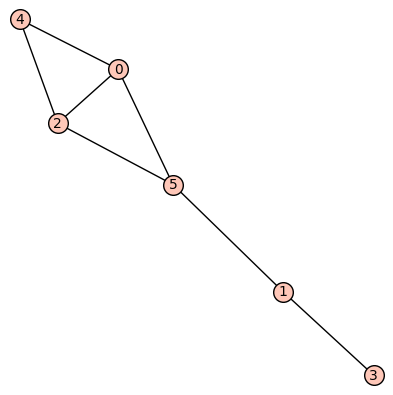

EQj_  6


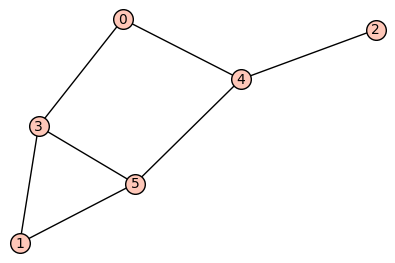

EEhW  6


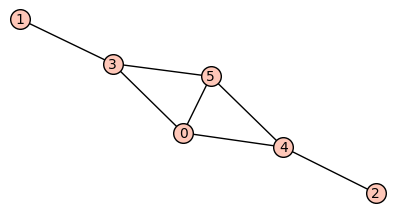

EEiW  6


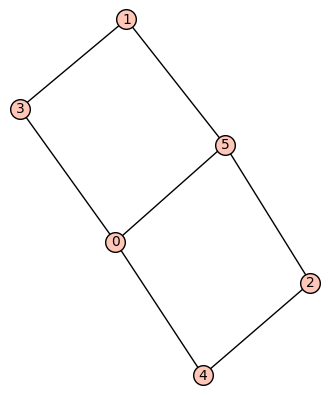

EEj_  6


In [14]:
df = pd.read_csv("results/resultsconnected6.csv")

# Get the index where the False occurs
indF = df.index[df.levelable == "F"]

# Randomly sample some 
ind = np.random.choice(indF, 10)

# Get a list of the graph6 strings that aren't levelable
g6sList = list(df.loc[ind]["graph6 string"])

# Print length of the longest path
for s in g6sList:
    g = Graph()
    from_graph6(g, s)
    g.show()
    
    print s + "  "+ str(g.longest_path().order())

### Look at levelable graphs

We should expect that these do not have such paths.

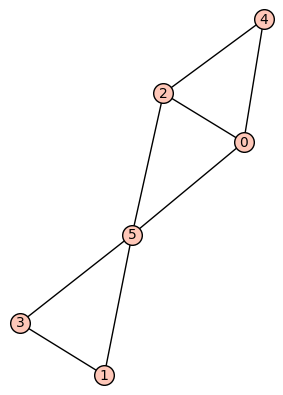

EQjo  6


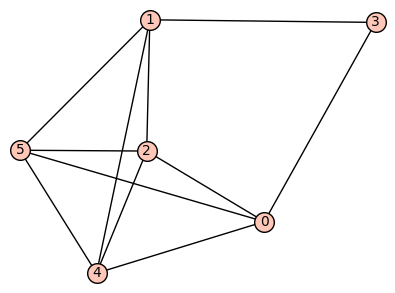

E]zg  6


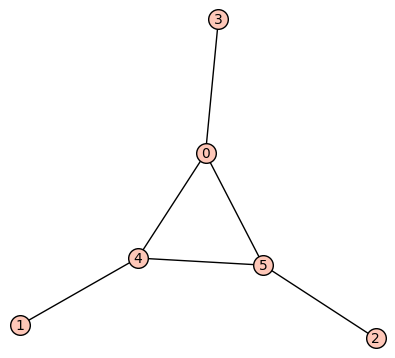

ECqg  5


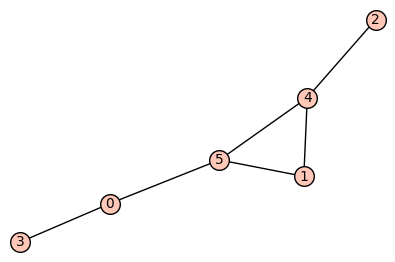

ECZG  6


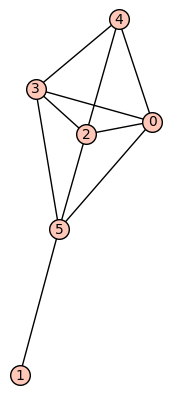

ETno  6


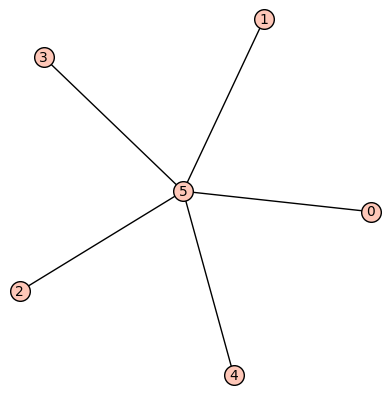

E?Bw  3


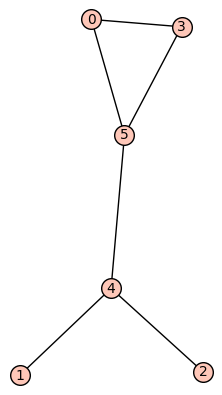

ECYW  5


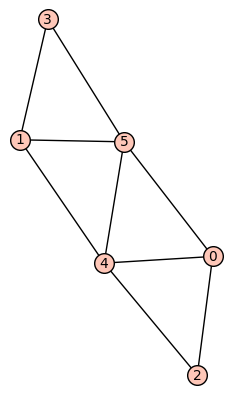

EQzW  6


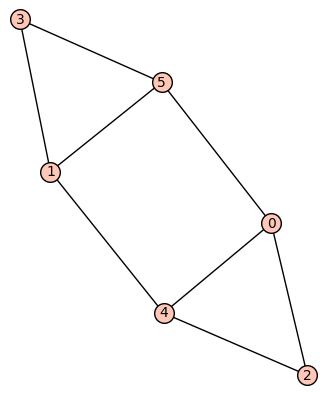

EQzO  6


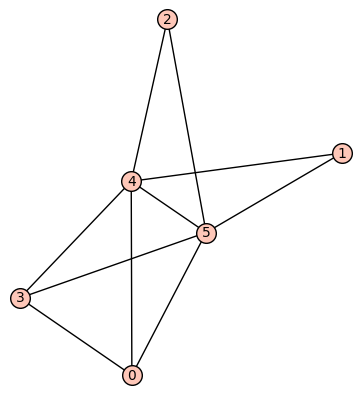

EC~w  6


In [16]:
df = pd.read_csv("results/resultsconnected6.csv")

# Get the index where levelable is true
indT = df.index[df.levelable == "T"]

# Randomly sample some 
ind = np.random.choice(indT, 10)

# Get a list of the graph6 strings that aren't levelable
g6sList = list(df.loc[ind]["graph6 string"])

# Print length of the longest path
for s in g6sList:
    g = Graph()
    from_graph6(g, s)
    g.show()
    
    print s + "  "+ str(g.longest_path().order())

### Look at graphs with only short paths

In [21]:
shortPaths = pd.DataFrame(columns = ["graph6 string", "longest path", "levelable"] )

for g in graphs.nauty_geng(8):
    if g.longest_path().order() < 5:
        shortPaths = shortPaths.append({"graph6 string": g.graph6_string(),
                          "longest path": g.longest_path().order(),
                          "levelable": is_levelable(g)}, 
                         ignore_index = True)

In [107]:
shortPaths

,graph6 string,longest path,levelable
0,G?????,0,True
1,G???C?,2,True
2,G???E?,3,True
3,G???F?,3,True
4,G???F_,3,True
5,G???Fo,3,True
6,G???Fw,3,True
7,G???F{,3,True
8,G??CA?,2,True
9,G??CE?,4,True


In [23]:
# Are all graphs with short paths levelable?
sum(shortPaths['levelable']) == shortPaths.shape[0]

True

### Conjecture 1 (graphs without long paths are levelable)

Let $G$ be a graph on $n > 5$ vertices. If the longest path in $G$ is less than 5 vertices long, then $\textrm{ind}(G)$ is levelable.

## Regular graphs

It's definitely not true that levelable graphs are necessarily regular. 

As a counterexample, this graph (with graph6 string `G??FF{` is levelable but not regular:

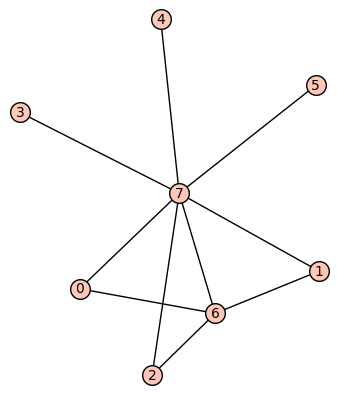

is levelable? True
is regular? False


In [63]:
g = Graph()
from_graph6(g, "G??FF{")

g.show()
print "is levelable? " + str(is_levelable(g))
print "is regular? " + str(g.is_regular())

### Are levelable graphs regular?

In [50]:
df = pd.read_csv("results/resultsconnected7.csv")

isRegular = pd.DataFrame(columns = ["graph6 string", "regular"])

for index, row in df.iterrows():
    g = Graph()
    from_graph6(g, row['graph6 string'])
    
    if g.is_regular():
        isRegular = isRegular.append({"graph6 string": row["graph6 string"], "regular":1}, ignore_index = True)
        
    elif not(g.is_regular()):
        isRegular = isRegular.append({"graph6 string": row["graph6 string"],"regular":0}, ignore_index = True)

In [57]:
df2 = df.merge(isRegular, on = "graph6 string")
df2[df2.regular == 1]

,graph6 string,levelable,minimized solution,regular
291,FCp`_,T,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]",1
720,FFzvO,T,"[2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0]",1
816,FUzro,T,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]",1
852,F~~~w,T,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]",1


## Are trees levelable?

In [55]:
treeTable = pd.DataFrame(columns = ["graph6 string", "levelable"])

for i in range(5, 10):
    for t in TreeIterator(i):
        treeTable = treeTable.append({"graph6 string": t.graph6_string(),
                        "levelable": is_levelable(t)}, ignore_index = True)

treeTable

,graph6 string,levelable
0,DkC,False
1,Dk_,True
2,Ds_,True
3,Eh_G,False
4,Ei_G,False
5,Eia?,True
6,EkE?,True
7,Eka?,True
8,Esa?,True
9,Fh_GG,False


### What do levelable trees look like?

Dk_


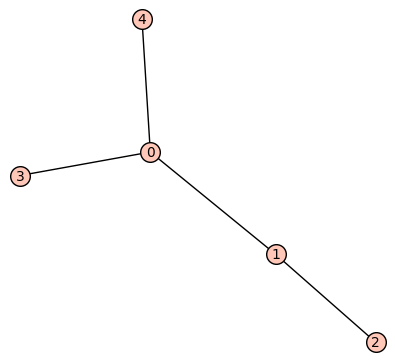

Ds_


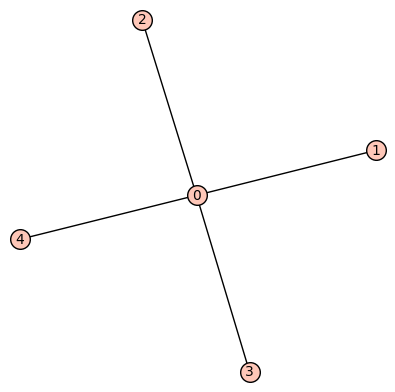

Eia?


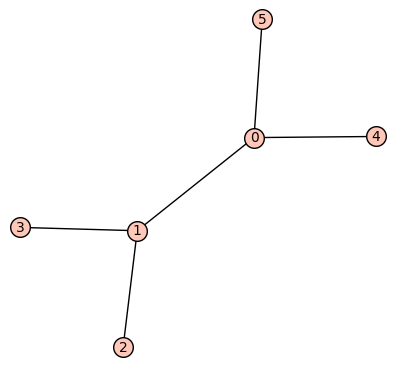

EkE?


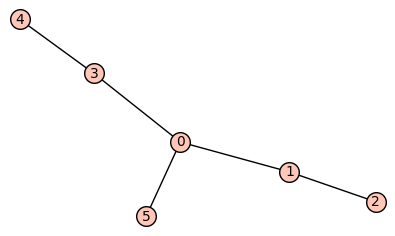

Eka?


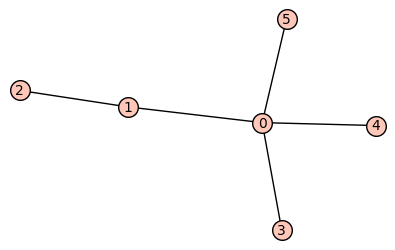

Esa?


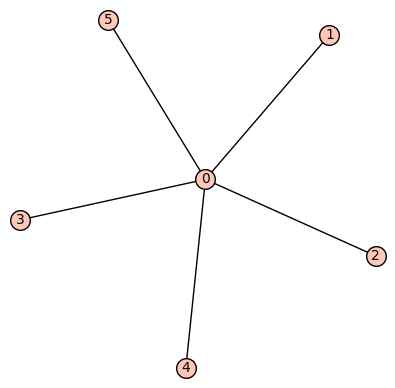

Fi_K?


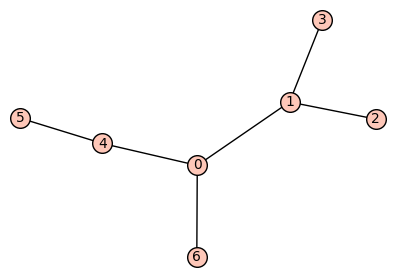

FiaC?


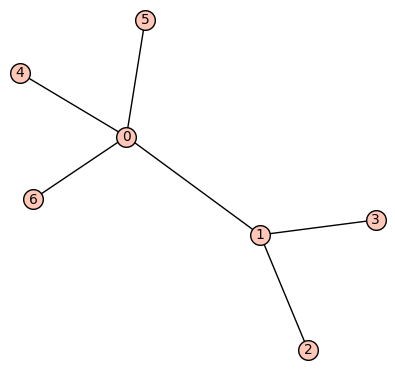

FkEC?


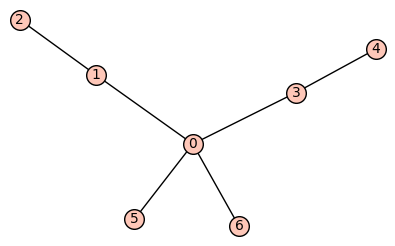

FkaC?


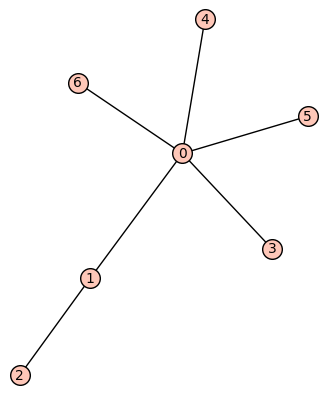

FsaC?


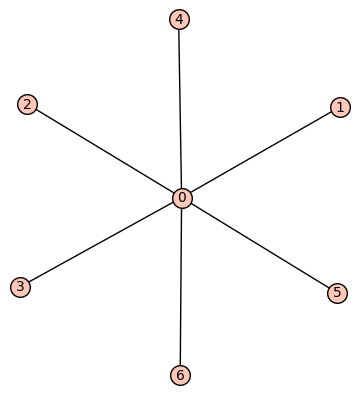

GhQ?K?


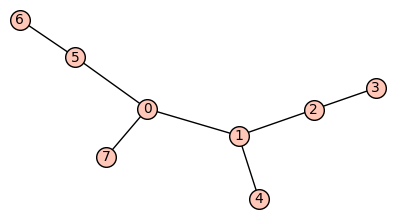

GiQ?K?


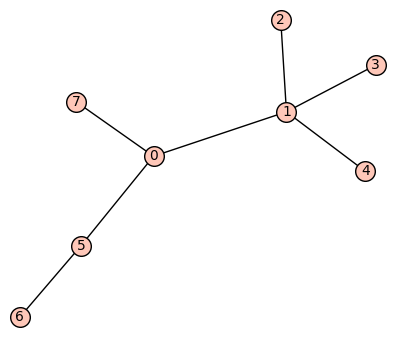

GiQCC?


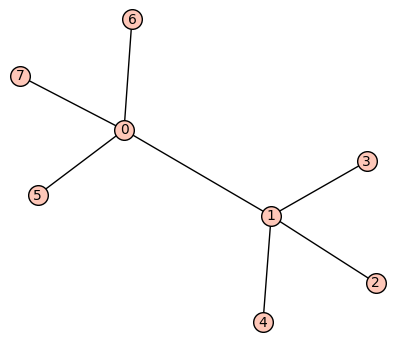

Gi_GS?


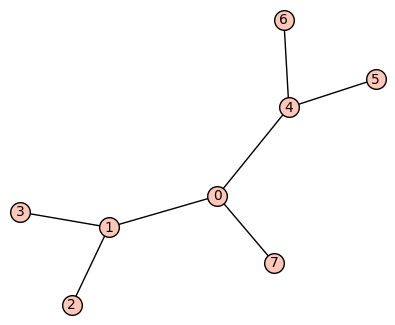

Gi_KC?


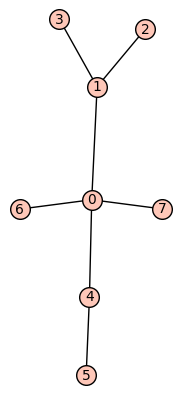

GiaCC?


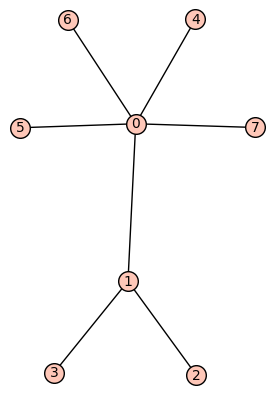

GkE?K?


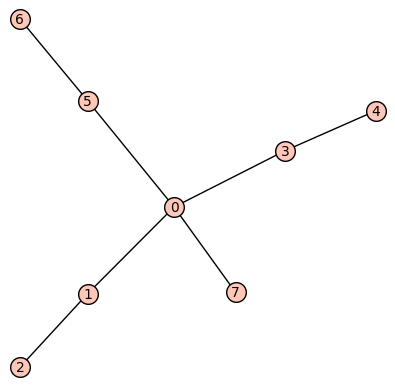

GkECC?


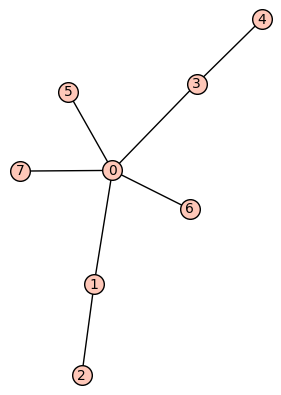

GkaCC?


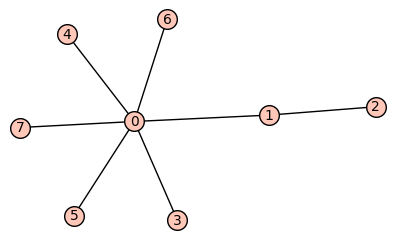

GsaCC?


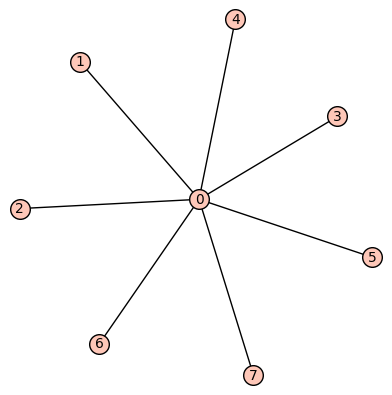

HhQ?GI?


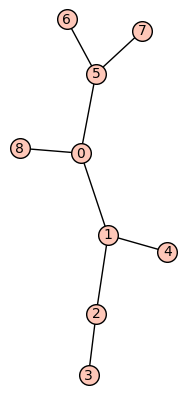

HhQ?KA?


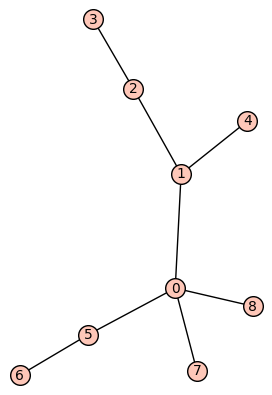

HiPC?E?


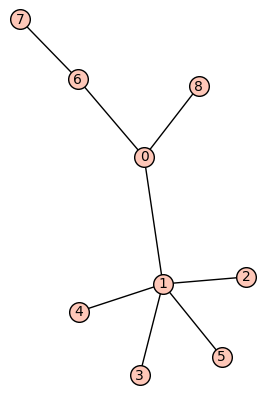

HiQ?GI?


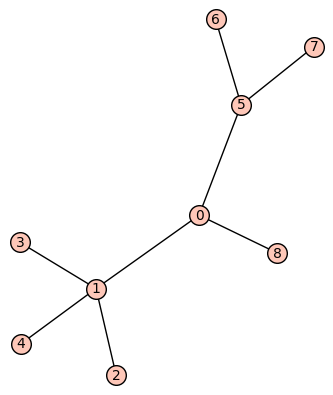

HiQ?KA?


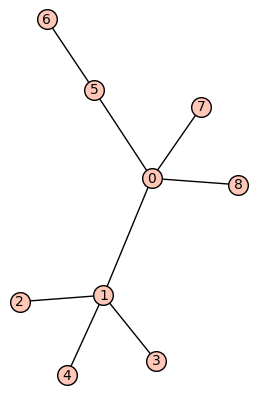

HiQCCA?


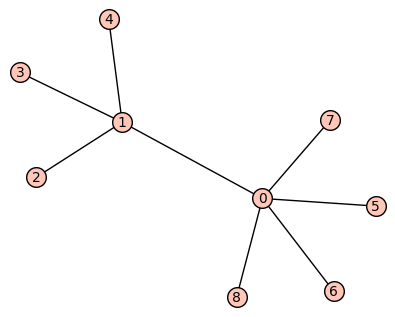

Hi_GSA?


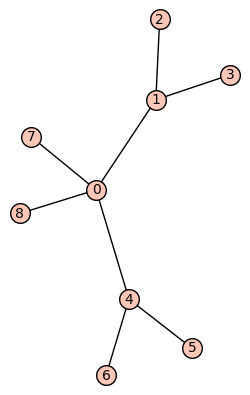

Hi_K?E?


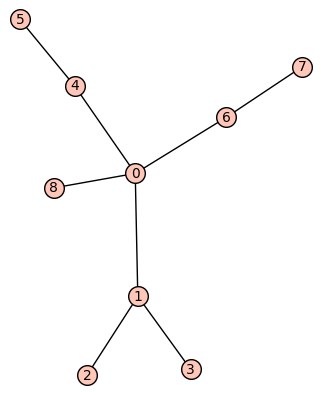

Hi_KCA?


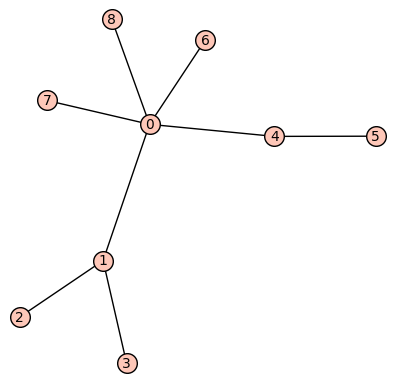

HiaCCA?


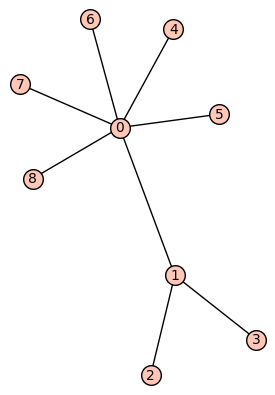

HkE?KA?


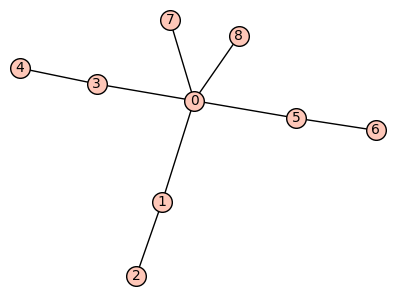

HkECCA?


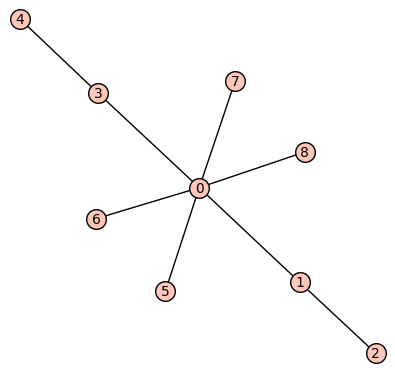

HkaCCA?


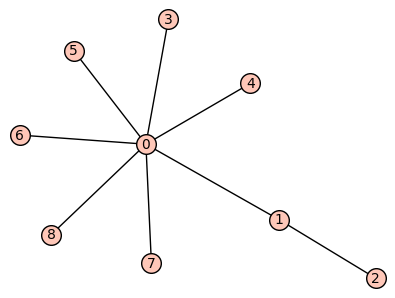

HsaCCA?


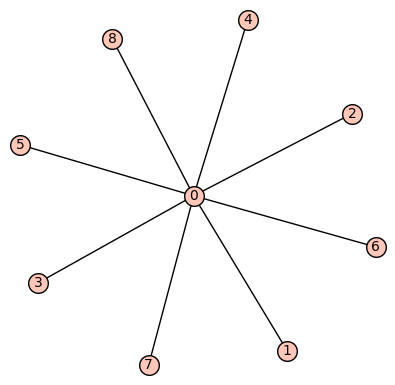

In [65]:
for index, row in treeTable[treeTable.levelable].iterrows():
    print row["graph6 string"]
    g6_show(row["graph6 string"])

### What do non-levelable trees look like?

DkC


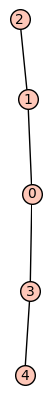

Eh_G


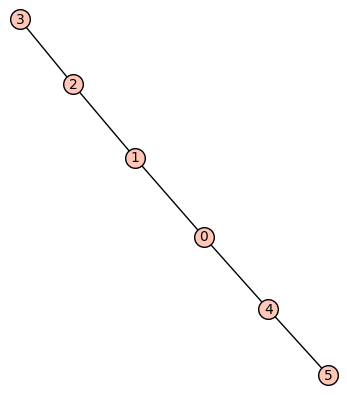

Ei_G


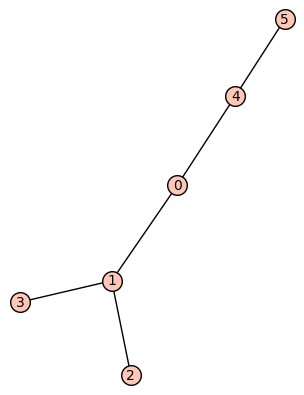

Fh_GG


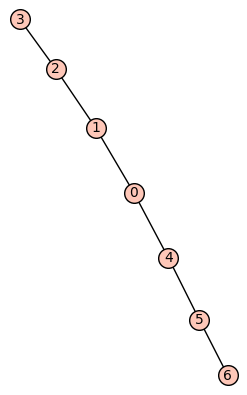

Fh_GO


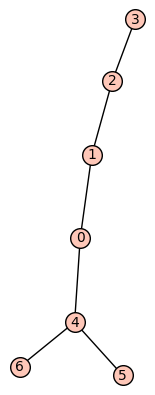

Fh_K?


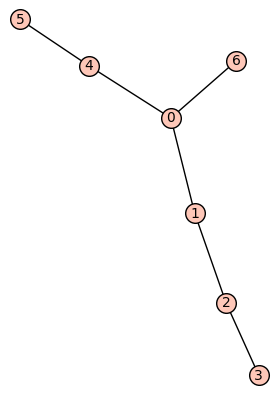

FiQ?G


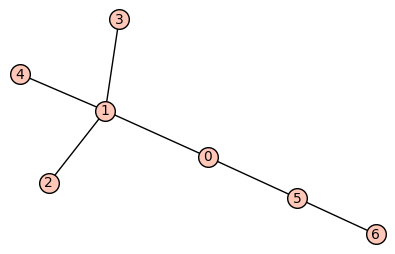

Fi_GO


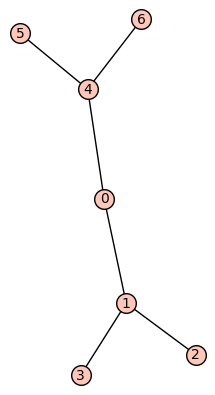

FkE?G


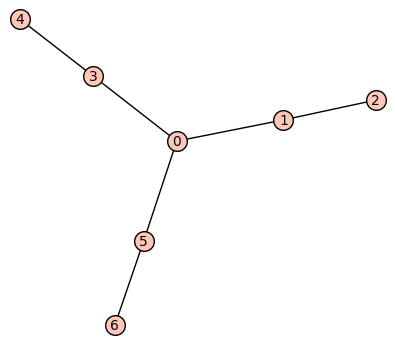

GhE?GC


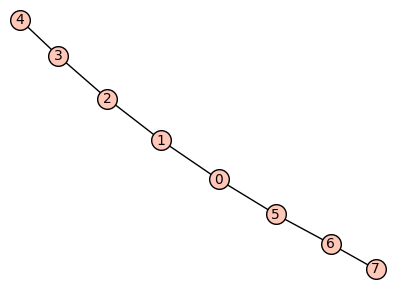

GhI?GC


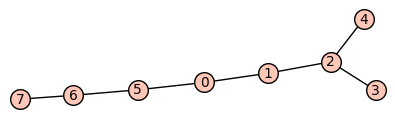

GhI?GG


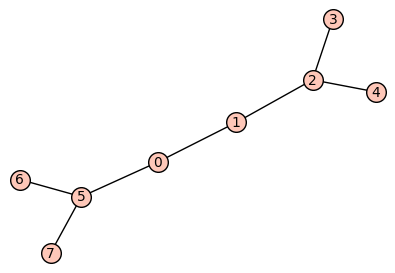

GhQ?GC


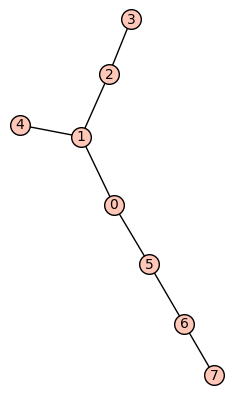

GhQ?GG


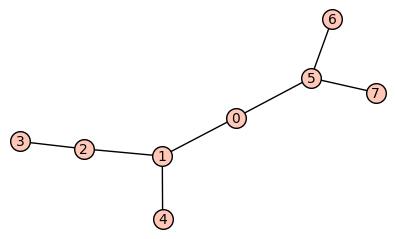

Gh_GK?


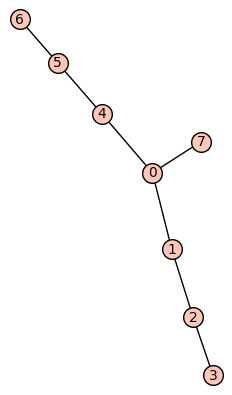

Gh_GOO


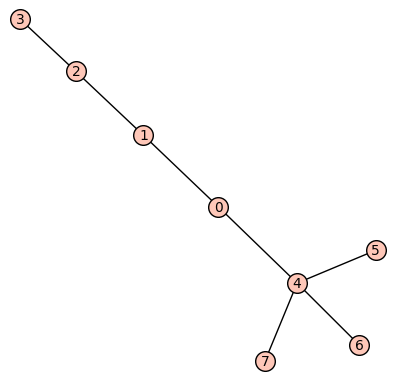

Gh_GS?


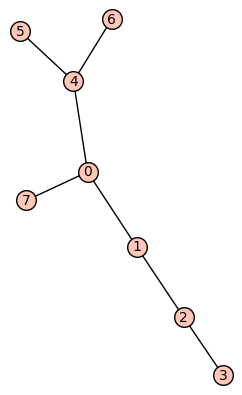

Gh_K?C


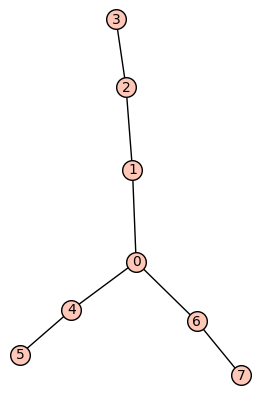

Gh_KC?


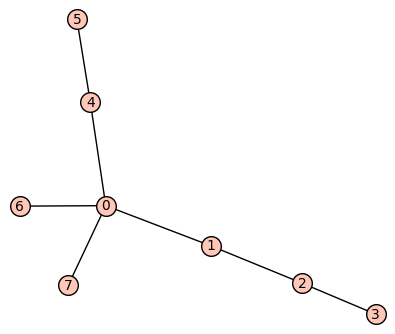

GiPC?C


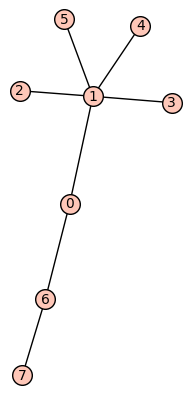

GiQ?GG


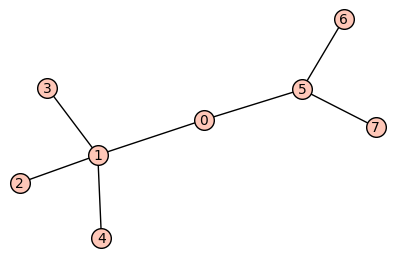

Gi_K?C


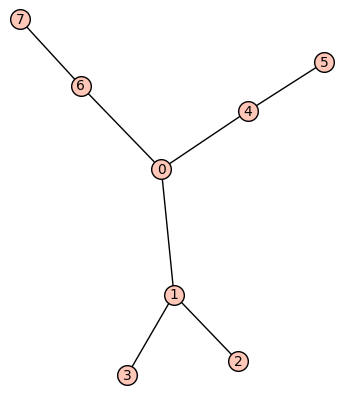

HhE?GC@


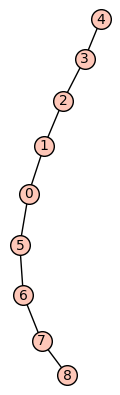

HhE?GCA


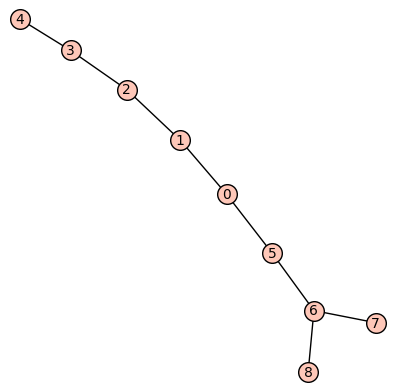

HhE?GCC


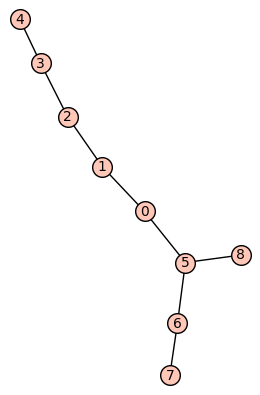

HhE?GE?


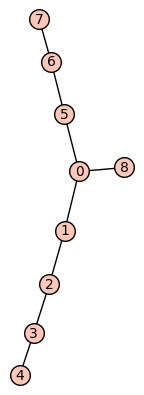

HhGc?C@


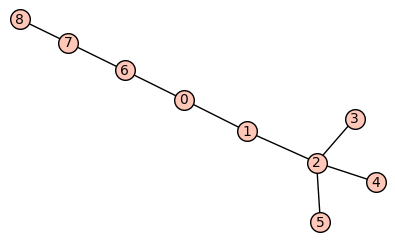

HhHC?C@


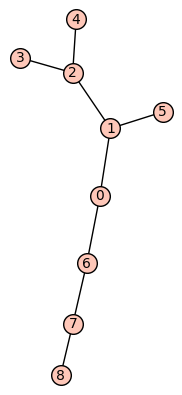

HhI?GCA


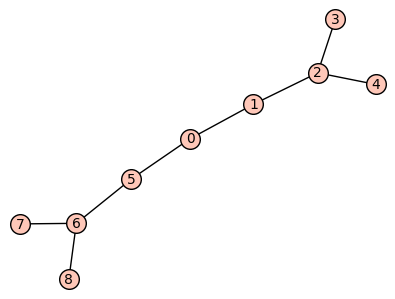

HhI?GCC


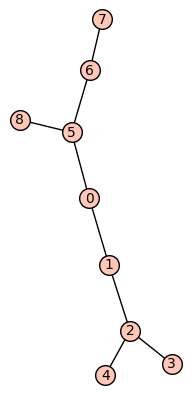

HhI?GE?


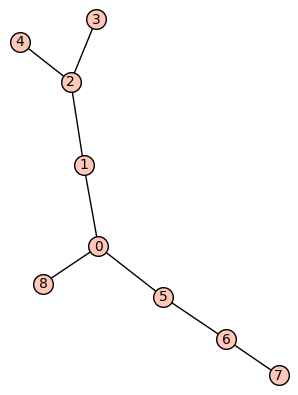

HhI?GGC


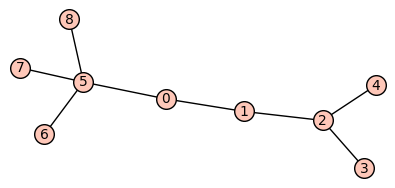

HhI?GI?


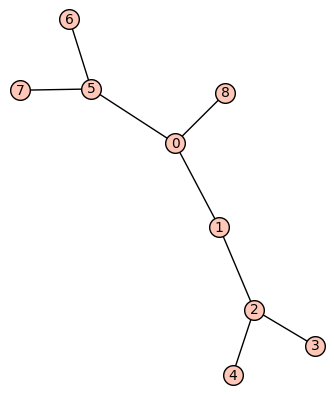

HhI?K?@


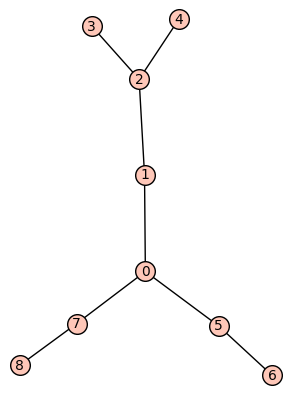

HhI?KA?


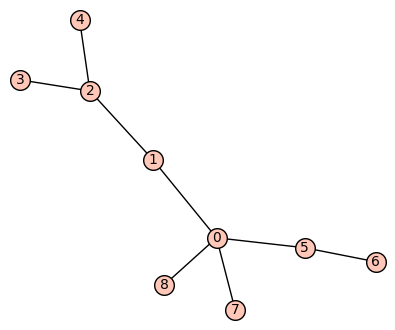

HhOK?C@


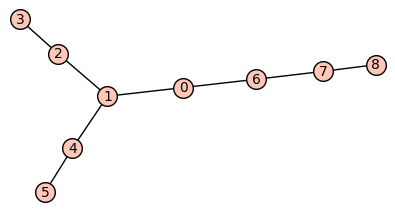

HhPC?C@


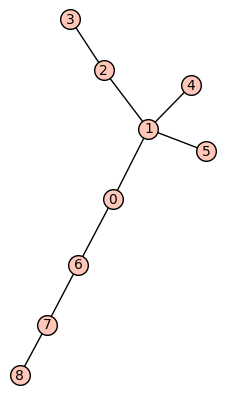

HhQ?GCC


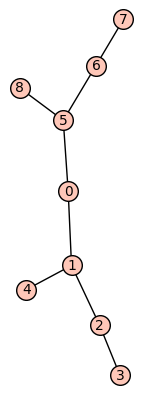

HhQ?GE?


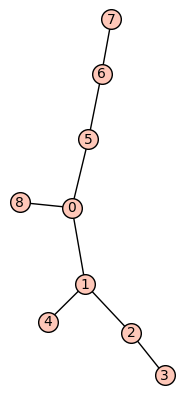

HhQ?GGC


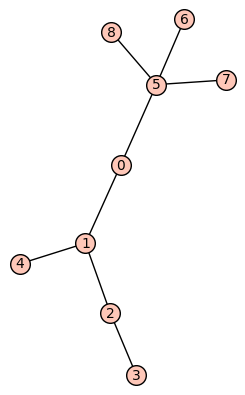

HhQ?K?@


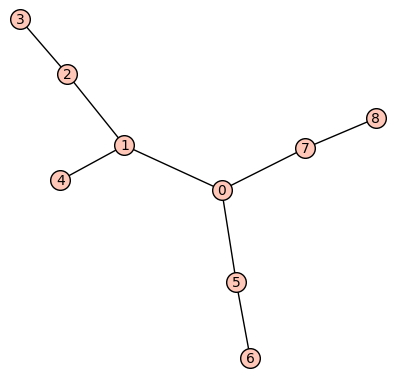

Hh_GK?@


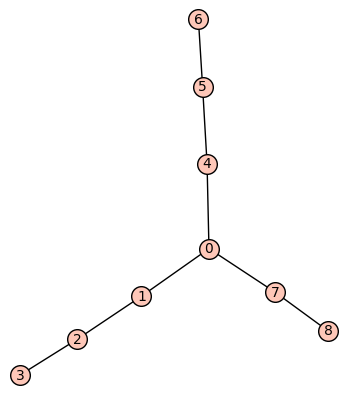

Hh_GKA?


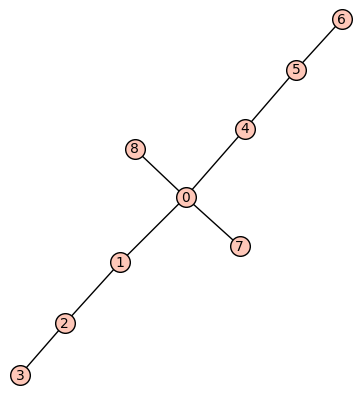

Hh_GOOG


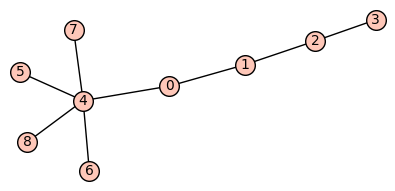

Hh_GOQ?


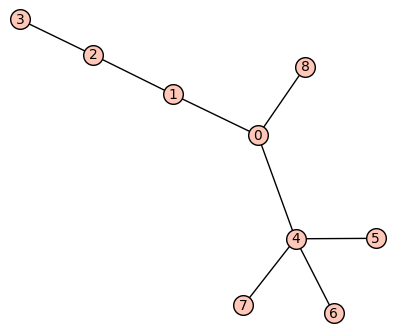

Hh_GS?@


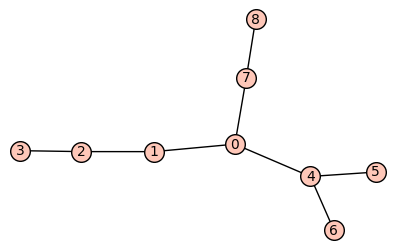

Hh_GSA?


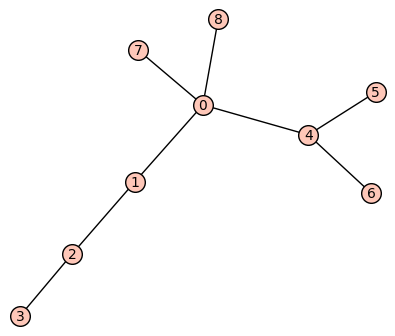

Hh_K?E?


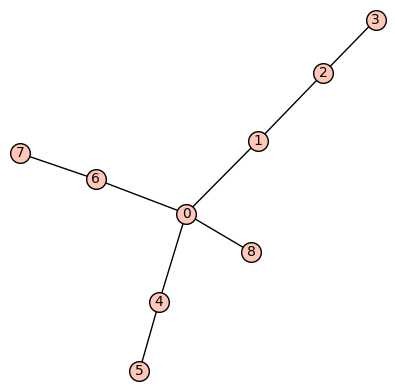

Hh_KCA?


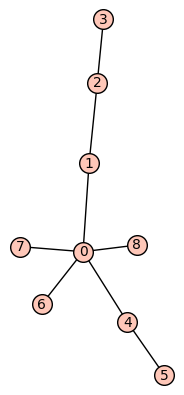

HiPAC?@


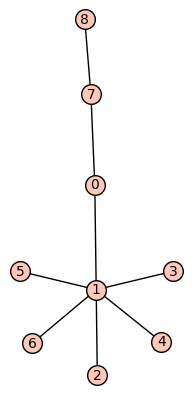

HiPC?CA


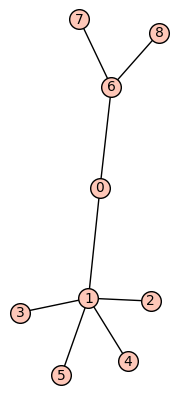

HiQ?GGC


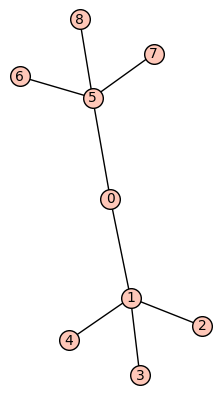

HiQ?K?@


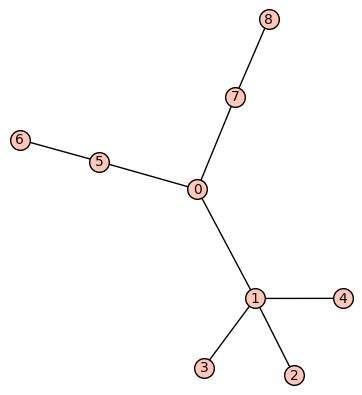

Hi_GS?@


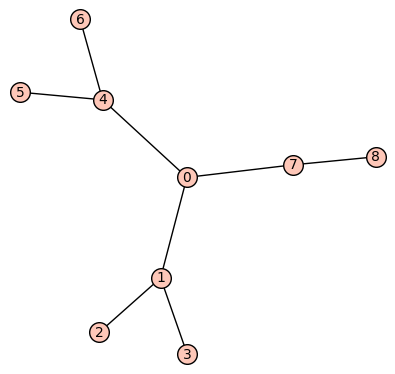

HkE?K?@


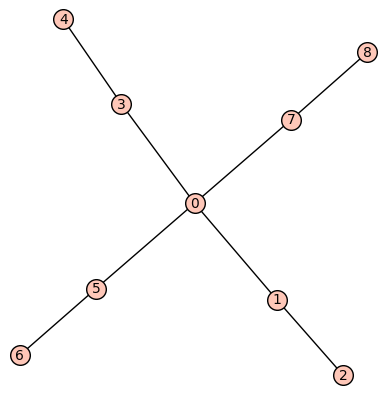

In [63]:
for index, row in treeTable[treeTable.levelable == False].iterrows():
    print row["graph6 string"]
    g6_show(row["graph6 string"])
    


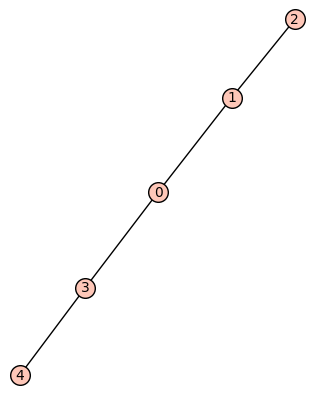

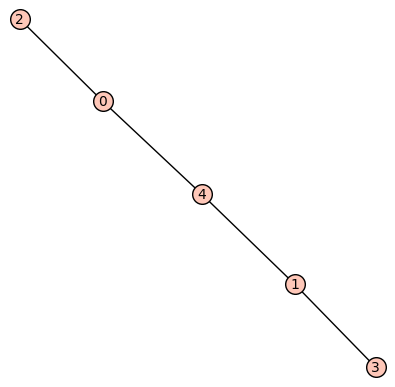

DBg
DBg


In [84]:
g_read("DkC").show()
g_read("DQo").show()

print g_read("DQo").canonical_label().graph6_string()
print g_read("DkC").canonical_label().graph6_string()

In [66]:
df5

,graph6 string,levelable,minimized solution
0,D??,T,"[2.0, 2.0, 2.0, 2.0, 2.0]"
1,D?_,T,"[2.0, 2.0, 2.0, 2.0, 2.0]"
2,D?o,T,"[2.0, 2.0, 2.0, 2.0, 3.0]"
3,D?w,T,"[2.0, 2.0, 2.0, 2.0, 4.0]"
4,D?{,T,"[2.0, 2.0, 2.0, 2.0, 5.0]"
5,DCO,T,"[2.0, 2.0, 2.0, 2.0, 2.0]"
6,DCo,T,"[2.0, 2.0, 2.0, 2.0, 2.0]"
7,DCW,T,"[2.0, 2.0, 2.0, 2.0, 3.0]"
8,DCc,T,"[2.0, 2.0, 2.0, 2.0, 2.0]"
9,DCw,T,"[2.0, 2.0, 2.0, 2.0, 3.0]"


In [3]:
load("lvb_funs.py")

is_levelable("DQo")

False

## To do:
    check for duplicates in graph6 string 
    counter example to induced subgraph (minimum obstruction): ECZG we can find induced P(5), and it is levelable
    bug-fixing linear program (try maximizing) 
    complete generating 9 vertices
    start generating 10 vertices
    
  
    question: if diam(G) is small, does that mean levelable?
    question: trees up to 10 vertices levelable?
    
    
To Do: From October 27
* show that it is enough to show for connected compments of a graph
* If it contains a P(5) + another condition is it definitely not levelable? What is this other condition? because it seems like most graphs who 
* Borrow: "Monomial Ideals"
* Grobner bases in Commutative Algebra by Ene and Herzog